### Here I'll put different functions to the test

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from time import time
import itertools

from Basics import Deck, test_shuffle
from win_lose import evaluate_7cards, evaluate_5cards, best_hand
from Game_Board import Test_Game

Testing basic functions and methods

In [2]:
mydeck = Deck()

In [3]:
#showing the unshuffled order of the deck
mydeck.order()

['14♣',
 '2♣',
 '3♣',
 '4♣',
 '5♣',
 '6♣',
 '7♣',
 '8♣',
 '9♣',
 '10♣',
 '11♣',
 '12♣',
 '13♣',
 '14♢',
 '2♢',
 '3♢',
 '4♢',
 '5♢',
 '6♢',
 '7♢',
 '8♢',
 '9♢',
 '10♢',
 '11♢',
 '12♢',
 '13♢',
 '14♡',
 '2♡',
 '3♡',
 '4♡',
 '5♡',
 '6♡',
 '7♡',
 '8♡',
 '9♡',
 '10♡',
 '11♡',
 '12♡',
 '13♡',
 '14♠',
 '2♠',
 '3♠',
 '4♠',
 '5♠',
 '6♠',
 '7♠',
 '8♠',
 '9♠',
 '10♠',
 '11♠',
 '12♠',
 '13♠']

In [4]:
#testing the shuffle function in Deck to see if hands are distributed equally
df_test_shuffle = test_shuffle(mydeck, 10000)

In [5]:
s_test_summary = df_test_shuffle.mean().sort_values(ascending = False).rename('avg_hand_freq')
s_test_summary

14♣    25.9463
7♢     25.7988
9♠     25.7779
4♣     25.7149
8♡     25.7122
2♠     25.6639
5♠     25.6567
8♢     25.6492
7♠     25.6477
13♡    25.6411
6♢     25.6359
12♣    25.6324
3♠     25.6311
11♣    25.6025
4♠     25.5950
10♠    25.5895
2♢     25.5874
8♣     25.5543
11♡    25.5472
6♠     25.5453
2♣     25.5291
3♡     25.5185
11♢    25.4877
5♢     25.4859
7♡     25.4856
3♣     25.4850
4♢     25.4777
14♡    25.4698
7♣     25.4667
10♢    25.4651
9♣     25.4580
9♢     25.4574
6♣     25.4448
8♠     25.4251
3♢     25.4126
13♢    25.4054
12♠    25.3973
11♠    25.3943
13♣    25.3916
9♡     25.3848
14♠    25.3795
10♡    25.3774
14♢    25.3725
12♢    25.3583
2♡     25.3432
4♡     25.3401
6♡     25.3324
12♡    25.3073
5♣     25.2973
13♠    25.2950
10♣    25.2456
5♡     25.1797
Name: avg_hand_freq, dtype: float64

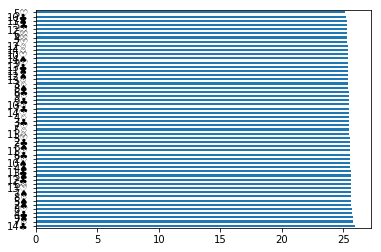

In [6]:
s_test_summary.plot(kind = 'barh')
plt.show()

Seems like the classes and the shuffle functions working okay

I'm going to gather some photos of the deck to make displaying some hands a little easier

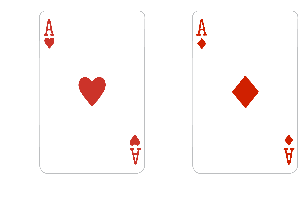

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#make new figure with 2 subfigures
#each subfigure can have an image in it
fig = plt.figure(figsize=(5, 3))
image1 = plt.subplot(121)
image2 = plt.subplot(122)

#read the image files (png files preferred)
img_source1 = mpimg.imread('images/14H.png')
img_source2 = mpimg.imread('images/14D.png')
#put the images into the window
_ = image1.imshow(img_source1)
_ = image2.imshow(img_source2)

#hide axis and show window with images
image1.axis("off")
image2.axis("off")
plt.show()

Trying to run some code a few times to collect some simulation data

In [ ]:
print('starting time: {}'.format(time()))
t0 = time()
winning_df = pd.DataFrame()
hands = 200000
for i in range(hands):
    winner_data = []

    participants = 10

    game_info = []
    whole_cards, comm = Test_Game('HOLDEM', participants)

    for player in whole_cards:
        player_cards = whole_cards[player]

        game_info.append([player, player_cards, comm])


    game_info_df = pd.DataFrame(game_info, columns = ['player', 'whole', 'comm'])
    game_info_df['combined'] = game_info_df['whole'] + game_info_df['comm']
    game_info_df['mess'] = game_info_df['combined'].apply(evaluate_7cards)
    game_info_df['best hand'] = game_info_df['mess'].apply(lambda x:x[0][0])
    game_info_df['eval'] = game_info_df['mess'].apply(lambda x:x[0][1])
    best = best_hand(list(game_info_df['mess'].apply(lambda x:x[0])))

    winner = game_info_df[game_info_df['eval'] == best[0][1]][['player', 'whole', 'comm', 'best hand', 'eval']]
    winner['round'] = i
    winning_df = winning_df.append(winner)

print('took {} seconds'.format(time() - t0))
print(winning_df.head())
#seems like for every 10 games, it takes ~5 seconds to run the algo
#so 1,000,000 games should take 500,000 seconds = 8333 mins = 138 hrs = 5.7 days to run.

starting time: 1533085451.498585


In [69]:
all_possible_whole = pd.DataFrame({'whole':[whole for whole in list(itertools.combinations(mydeck.order(), 2))]})
print(all_possible_whole.iloc[100:106])
all_possible_whole['whole rank'] = all_possible_whole['whole'].apply(lambda x: [int(i[:-1]) for i in x]).apply(lambda x: sorted(x)).apply(tuple)
all_possible_whole['whole suit'] = all_possible_whole['whole'].apply(lambda x: [i[-1] for i in x]).apply(lambda x: sorted(x)).apply(tuple)
all_possible_whole['whole'] = all_possible_whole['whole'].apply(sorted).apply(tuple)
print(all_possible_whole.iloc[100:106])
print(all_possible_whole.shape)

          whole
100  (11♢, 12♢)
101    (6♢, 4♣)
102   (6♢, 14♣)
103   (6♢, 11♡)
104    (6♢, 4♢)
105    (6♢, 9♣)
          whole whole rank whole suit
100  (11♢, 12♢)   (11, 12)     (♢, ♢)
101    (4♣, 6♢)     (4, 6)     (♢, ♣)
102   (14♣, 6♢)    (6, 14)     (♢, ♣)
103   (11♡, 6♢)    (6, 11)     (♡, ♢)
104    (4♢, 6♢)     (4, 6)     (♢, ♢)
105    (6♢, 9♣)     (6, 9)     (♢, ♣)
(1326, 3)


In [106]:
winning_df_summary = winning_df['whole'].apply(sorted).apply(tuple).copy().value_counts().to_frame()
winning_df_summary.rename(columns = {'whole': 'counts'}, inplace = True)
print(winning_df_summary.head())
print(winning_df_summary.shape)

            counts
(12♡, 13♡)      25
(10♢, 9♢)       24
(12♠, 12♣)      22
(12♠, 12♢)      22
(9♠, 9♢)        22
(1325, 1)


In [109]:
all_possible_whole = all_possible_whole.merge(winning_df_summary, how = 'outer', left_on = 'whole', right_index = True)
all_possible_whole.shape

(1326, 5)

In [57]:
winning_df_summary[winning_df_summary['whole rank'] == (2, 2)]

,whole,whole rank,whole suit
7,"(2♡, 2♢)","(2, 2)","(♡, ♢)"
9,"(2♢, 2♣)","(2, 2)","(♢, ♣)"
2,"(2♢, 2♣)","(2, 2)","(♢, ♣)"
4,"(2♢, 2♣)","(2, 2)","(♢, ♣)"
5,"(2♡, 2♣)","(2, 2)","(♡, ♣)"
9,"(2♣, 2♢)","(2, 2)","(♢, ♣)"
5,"(2♢, 2♣)","(2, 2)","(♢, ♣)"
2,"(2♣, 2♠)","(2, 2)","(♠, ♣)"
2,"(2♡, 2♠)","(2, 2)","(♠, ♡)"
6,"(2♡, 2♣)","(2, 2)","(♡, ♣)"


In [29]:
winning_df.head()

,player,whole,comm,best hand,eval,round
2,2,"[12♠, 11♣]","[14♡, 10♡, 13♠, 6♣, 12♡]","(12♠, 11♣, 14♡, 10♡, 13♠)","(5, Straight, 14, 0)",0
0,0,"[14♡, 13♣]","[11♣, 3♡, 12♢, 6♣, 10♢]","(14♡, 13♣, 11♣, 12♢, 10♢)","(5, Straight, 14, 0)",1
7,7,"[5♠, 8♣]","[10♡, 14♡, 7♣, 5♣, 8♢]","(5♠, 8♣, 14♡, 5♣, 8♢)","(3, 2 Pairs, [8, 5], 14)",2
2,2,"[7♢, 2♢]","[2♠, 5♢, 8♢, 8♣, 4♢]","(7♢, 2♢, 5♢, 8♢, 4♢)","(6, Flush, [8, 7, 5, 4, 2], 0)",3
6,6,"[10♣, 3♣]","[13♣, 11♡, 13♡, 5♣, 6♣]","(10♣, 3♣, 13♣, 5♣, 6♣)","(6, Flush, [13, 10, 6, 5, 3], 0)",4


Develop some analysis for the DataFrame
- extract the rank and suit first into two different dataframes
- classify the whole cards into categories:
    - same suit
    - consecutive rank
    - pair
    - 

In [105]:
winning_df['whole rank'] = winning_df['whole'].apply(lambda x: [int(i[:-1]) for i in x]).apply(lambda x: sorted(x)).apply(tuple)
winning_df['whole suit'] = winning_df['whole'].apply(lambda x: [i[-1] for i in x]).apply(lambda x: sorted(x)).apply(tuple)

In [106]:
winning_df[['whole rank', 'whole suit', 'whole']].head(10)

,whole rank,whole suit,whole
1,"(9, 12)","(H, S)","[9H, 12S]"
0,"(6, 9)","(D, H)","[6D, 9H]"
2,"(6, 14)","(C, H)","[6C, 14H]"
3,"(6, 12)","(D, S)","[12D, 6S]"
8,"(8, 13)","(D, S)","[13D, 8S]"
5,"(10, 12)","(C, S)","[12S, 10C]"
7,"(4, 7)","(H, H)","[7H, 4H]"
6,"(6, 9)","(H, H)","[9H, 6H]"
9,"(6, 9)","(C, D)","[9C, 6D]"
5,"(12, 14)","(D, H)","[12H, 14D]"


In [121]:


winning_df['whole rank'].value_counts()/10000/10*100

(12, 14)    0.203
(10, 11)    0.196
(8, 10)     0.186
(11, 12)    0.183
(13, 14)    0.181
(9, 10)     0.180
(12, 13)    0.179
(11, 14)    0.173
(10, 13)    0.172
(7, 9)      0.170
(9, 11)     0.167
(11, 13)    0.163
(9, 12)     0.162
(9, 13)     0.159
(5, 14)     0.157
(6, 9)      0.156
(8, 12)     0.156
(7, 10)     0.155
(10, 12)    0.154
(9, 14)     0.153
(7, 14)     0.152
(6, 7)      0.152
(8, 13)     0.150
(10, 14)    0.149
(8, 9)      0.147
(5, 6)      0.146
(7, 8)      0.144
(8, 14)     0.144
(7, 12)     0.143
(4, 11)     0.142
            ...  
(3, 11)     0.116
(4, 8)      0.116
(13, 13)    0.114
(3, 14)     0.114
(4, 9)      0.110
(12, 12)    0.108
(4, 7)      0.106
(3, 7)      0.106
(2, 13)     0.105
(3, 8)      0.105
(3, 10)     0.104
(2, 8)      0.103
(4, 10)     0.100
(14, 14)    0.097
(9, 9)      0.095
(2, 7)      0.092
(3, 9)      0.091
(2, 4)      0.088
(2, 6)      0.087
(2, 3)      0.084
(4, 4)      0.084
(6, 6)      0.084
(2, 10)     0.083
(7, 7)      0.081
(8, 8)    

In [115]:
winning_df['whole suit'].count()

whole suit    11663
dtype: int64